## imports

In [2]:
# Execute before using this notebook if using google colab
kernel = str(get_ipython())
if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


from subprocess import call
from IPython.display import Image

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [9,7]
plt.rcParams['figure.dpi'] = 80
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## Helper functions

In [4]:
def plot_boundaries(X,y,clf,plot_step=0.2, s=50):

    plot_step = plot_step


    x1 = X[:,0]
    x2 = X[:,1]

    x_min, x_max = x1.min() - 1, x1.max() + 1
    y_min, y_max = x2.min() - 1, x2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(x1,x2,c=y,s=s)
    plt.xlabel("X1")
    plt.ylabel("X2");

In [59]:
def plot_tree(tree_clf, feature_names, class_names):
    
    from sklearn.tree import export_graphviz
    
    export_graphviz(
        tree_clf,
        out_file="MyTree_small.dot",
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    call(["dot", "-Tpng", "MyTree_small.dot", "-o", "MyTree_small.png", "-Gdpi=100"])
    return Image(filename='MyTree_small.png') 

# Decision Tree: Classification

Classification decision trees can be build in python quite easily using `scikit learn` library using

```
from sklearn.tree import DecisionTreeClassifier
```

Let's use the `Auto.csv` dataset to see how it works. 


In [91]:
df = pd.read_csv("./data/Auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Let us try to build a classification tree with 
- y = car is from USA (origin = 1) or not (origin = 2 or 3) 
- X = horsepower and weight

For this we will 

- create a new y variable called (US) taking value of 1 if car is from USA and 0 if otherwise

In [96]:
df["US"] = np.where(df["origin"]==1,1,0)
y, X = dmatrices("US ~ horsepower + weight -1", df)

We will now

1. plot the relationship between X and y

1. calculate a decision tree

2. plot the decision boundaries

3. calculate the accuracy score

4. plot the decision tree

__1. Plot the data__

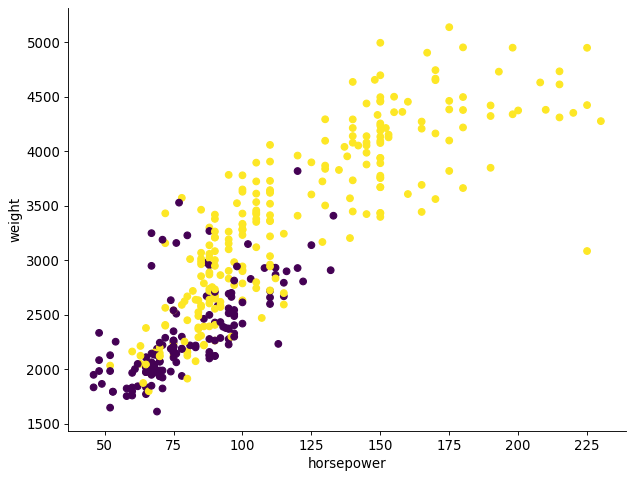

In [97]:
plt.scatter(x="horsepower",y="weight", c="US",data=df)
plt.xlabel("horsepower"), plt.ylabel("weight");

__2. Calculate the decision tree__

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
tree_clf = DecisionTreeClassifier(max_depth=4) # change max_depth to make tree smaller or larger
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=4)

__3. Calculate the accuracy score__

Note that for evaluating the accuracy of the model all aspects are valid that were discussed for Logistic Regression. 

In [105]:
tree_clf.score(X,y)

0.8571428571428571

__4. Plot the decision boundaries__

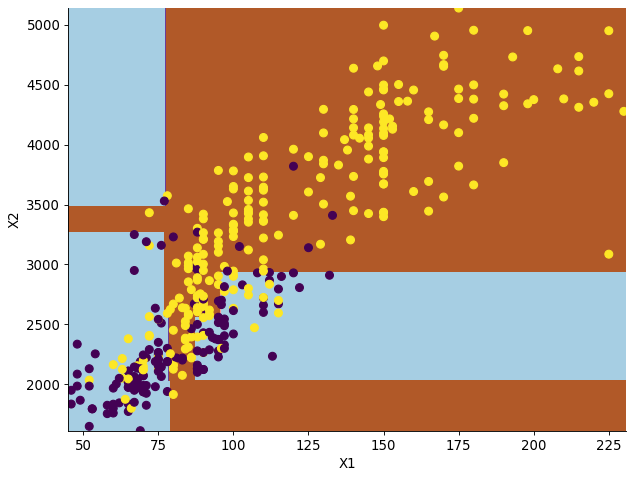

In [106]:
plot_boundaries(X,y,tree_clf)

__5. Plot decision tree__

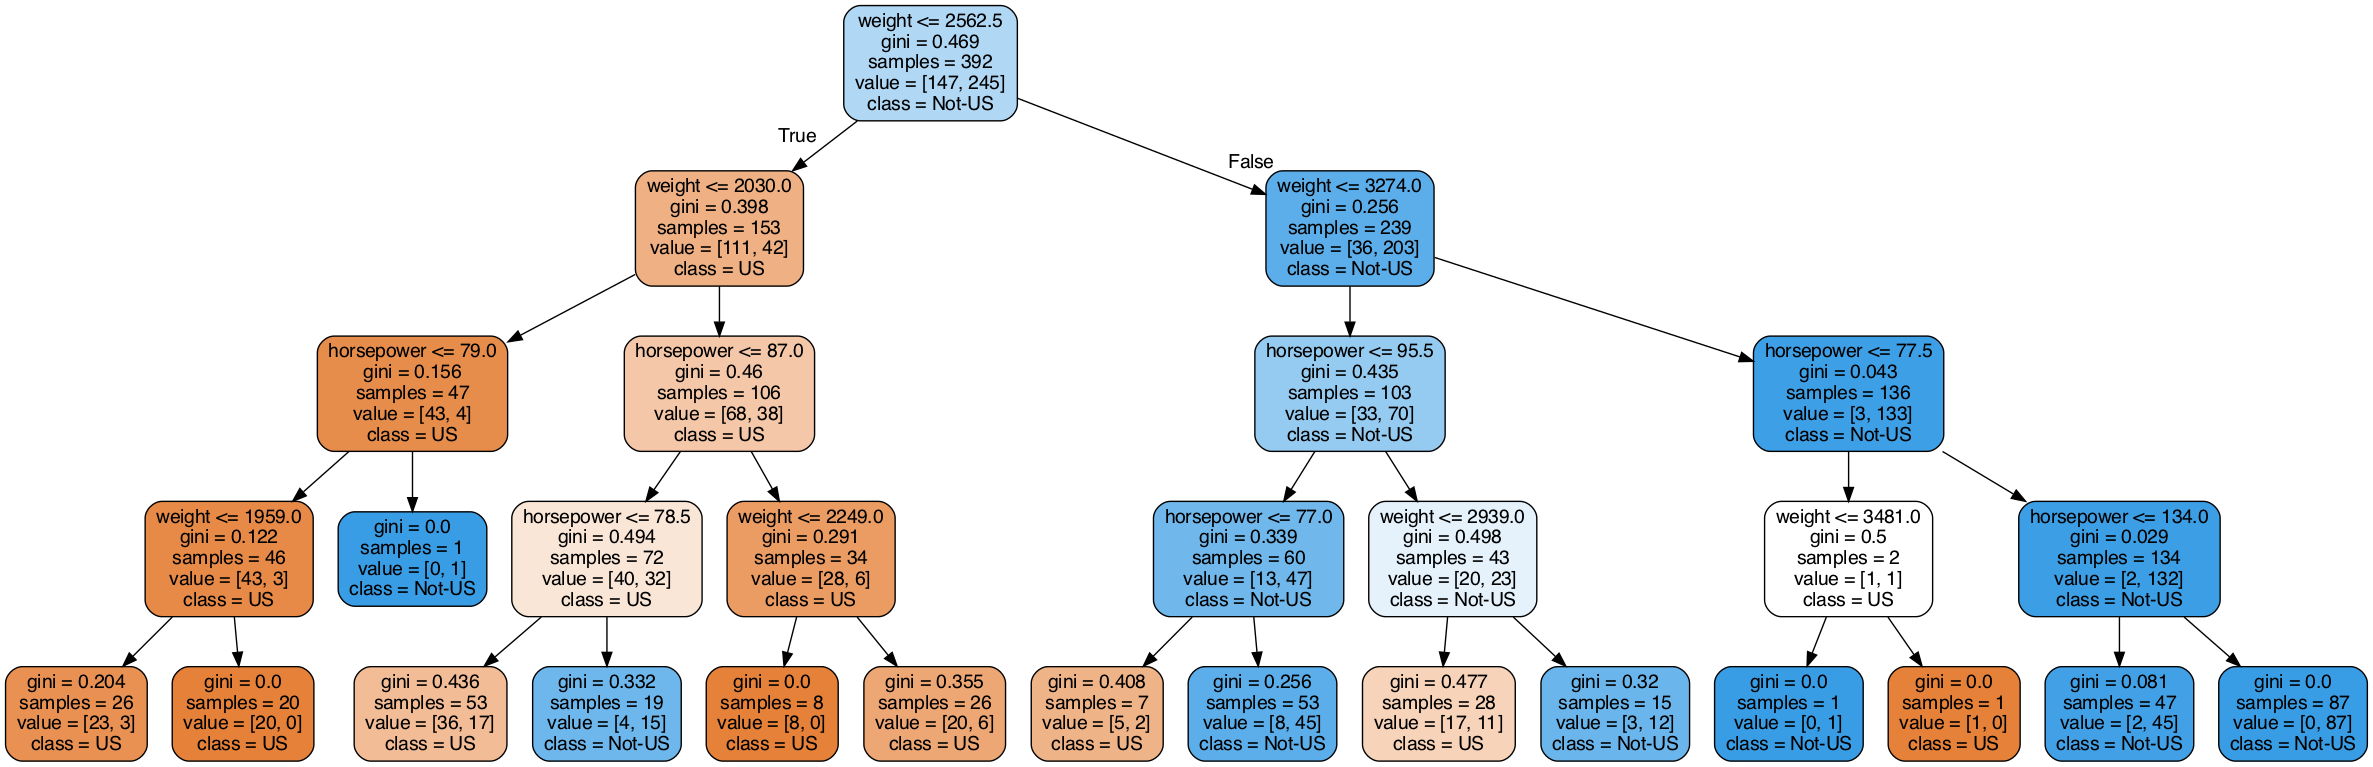

In [107]:
plot_tree(tree_clf, ["horsepower", "weight"], class_names=["US", "Not-US"])

# Decision Tree: Regression

Regression decision trees can be build in python quite easily using `scikit learn` library using

```
from sklearn.tree import DecisionTreeRegressor
```

Let us try to build a regression tree with 
- y = miles per gallon
- X = horsepower

In [246]:
y, X = dmatrices("mpg ~ horsepower -1", df)

We will now

1. plot relationship between X and y 

1. calculate a decision tree

2. plot estimated regression line vs. real data

3. calculate the accuracy score

4. plot the decision tree

__1. Plot the data__

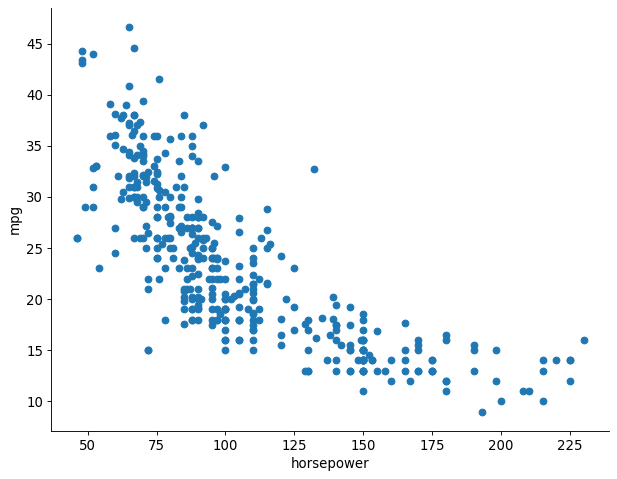

In [247]:
plt.scatter(x="horsepower",y="mpg", data=df)
plt.xlabel("horsepower"), plt.ylabel("mpg");

__2. Calculate the decision tree__

In [248]:
from sklearn.tree import DecisionTreeRegressor

In [249]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=5)

__3. Plot the decision boundaries__

In [250]:
xs = np.linspace(np.min(X),np.max(X),1000).reshape(-1,1)
yhat = tree_reg.predict(xs).reshape(-1,1)

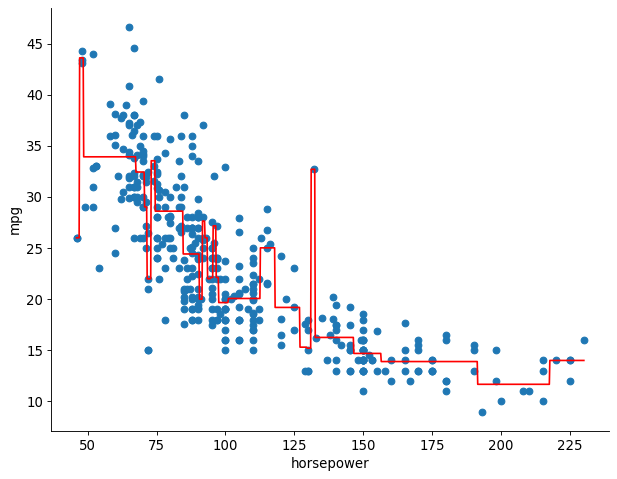

In [251]:
plt.scatter(x="horsepower",y="mpg", data=df)
plt.plot(xs,yhat, color="red")
plt.xlabel("horsepower"), plt.ylabel("mpg");

__4. Calculate the error (here: r2)__


In [252]:
tree_reg.score(X,y)

0.782788347433298

__5. Plot decision tree__

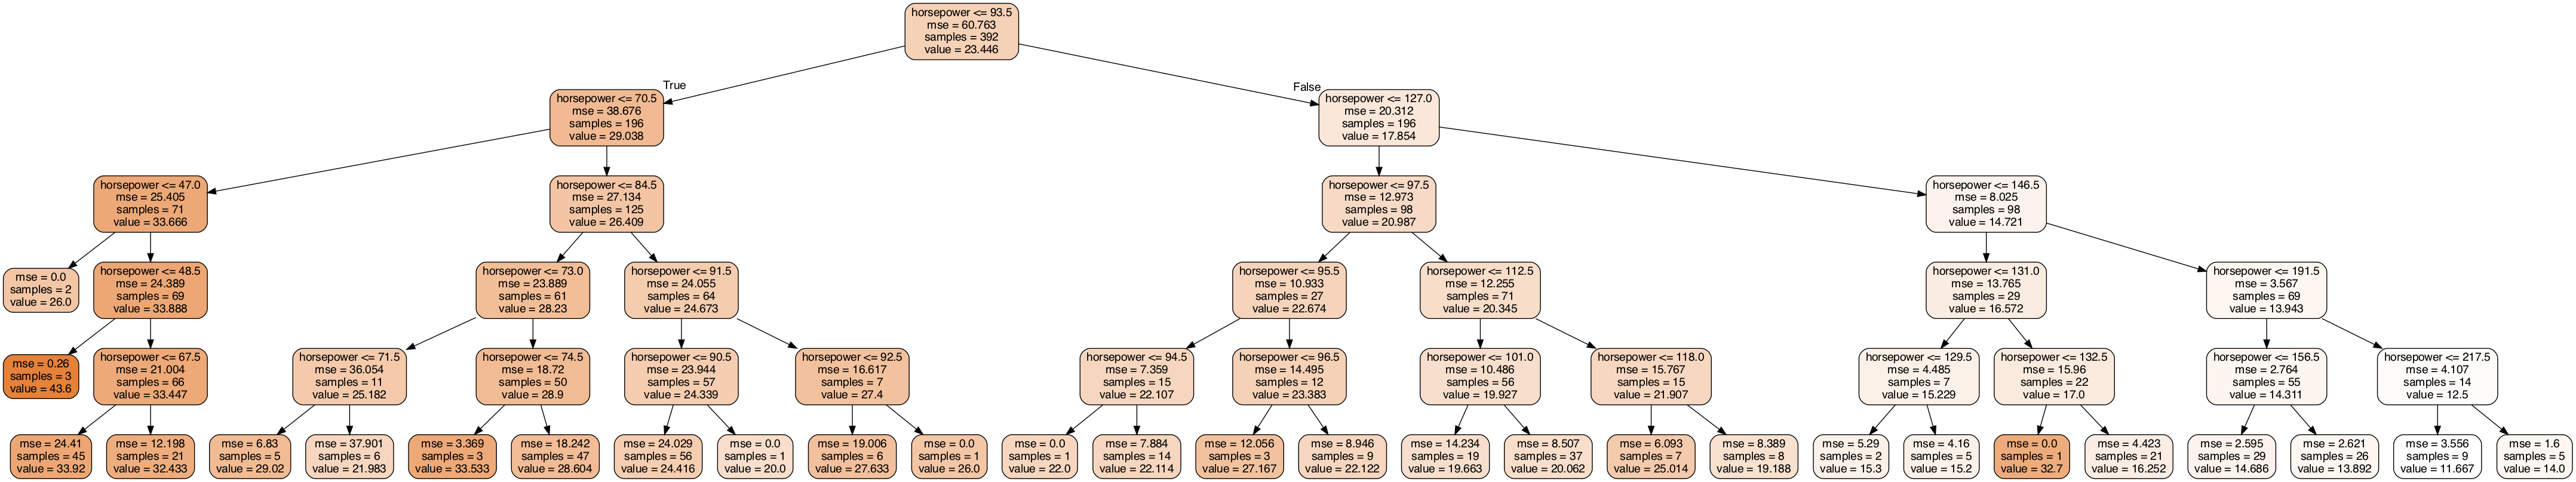

In [253]:
plot_tree(tree_reg, feature_names=["horsepower"], class_names=None)